In [1]:
import numpy as np
import time

import matplotlib.pyplot as plt

$\frac{1}{4}x_i^{4} + \frac{1}{2}x_i^{2} +x_i$

In [59]:
def f(x):
    '''
    1/4 * x^4 + 1/2 * x^2 + x 
    '''
    f = np.zeros(len(x))
    for i in range(len(x)):
        f[i] = np.power(x[i], 4)/4 + np.power(x[i], 2)/2 + x[i]
    return f

def delta_f(x, method = 'e', k = 10):
    '''
    method:
        e : exact gradient function,
        f : forward differences,
        b : backward differences,
        c : centered differences
    
    k : value for increment h; is ignored when method='e'
    
    Exact gradient function:
        x^3 + x + 1 
    
    Forward differences:
        (f(x+h) - f(x)) / h

    Backward differences:
        (f(x) - f(x-h)) / h

    Centered differences:
        (f(x+h) - f(x-h)) / 2h
    
    where h = 10^-k norm(x)
    '''
    
    if method == 'e': 
        return np.power(x, 3) + x + 1
    elif method =='f':
        h = np.ones(len(x)) * 10**(-k) * np.linalg.norm(x)
        return (f(x+h) - f(x)) / h   
    elif method =='b':
        h = np.ones(len(x)) * 10**(-k) * np.linalg.norm(x)
        return (f(x) - f(x-h)) / h
    elif method =='c':
        h = np.ones(len(x)) * 10**(-k) * np.linalg.norm(x)
        return (f(x+h) - f(x-h)) / (2*h)      

def delta2_f(x):
    return 3 * np.power(x, 2) + 1

In [ ]:
f()

In [54]:
def steepest_descent(x0, kmax, tollgrad, descent_method = 'steepest', alpha = 0.31, grad_method = 'e', grad_method_k = 10):
    x = np.zeros((len(x0), kmax+1)) # kmax+1 because we need to also consider x[k+1] case later on
    x[:, 0] = x0
    
    p_k = -delta_f(x0, method = grad_method, k = grad_method_k)
    
    delta_fk_norm = np.linalg.norm(delta_f(x0, method = grad_method, k = grad_method_k))
    
    alpha_k = alpha
    k = 0
    
    # constants for line search algorithm
    rho = 0.45
    jmax = 30
    c1_arm = 10**(-4)
    c2_wol = 0.1
    
    s = time.time()
    if descent_method == 'steepest':
        while(k < kmax and delta_fk_norm >= tollgrad):

            # Find alpha using line search(backtracking method)
            j = 0
            while (j < jmax and
                   f(x[:, k] + alpha_k * p_k).sum() > f(x[:, k]).sum() + c1_arm * alpha_k * delta_f(x[:, k], method = grad_method, k = grad_method_k).T @ p_k):
                alpha_k = alpha_k * rho
                j+=1
#                 print(j, alpha_k)

            # Compute the new value for xk
            x[:, k+1] = x[:, k] + alpha_k * p_k

            p_k = -delta_f(x[:, k+1], method = grad_method, k = grad_method_k)

            # Compute the gradient of f in xk
            delta_fk_norm = np.linalg.norm(delta_f(x[:, k+1], method = grad_method, k = grad_method_k))

            # Increase the step by one
            k += 1
            
#             print(f"k:{k}, {x[:, k]}")

    elif descent_method == 'fr':
        gradf_k = delta_f(x0, method = grad_method, k = grad_method_k)
        while(k < kmax and delta_fk_norm >= tollgrad):

            # Compute dk
#             d_k = -gradf_k
            
            
            #TODO: Choose one method for finding alpha
            
            # Find alpha using line search(backtracking method)
            j = 0
            while (j < jmax and 
                (f(x[:, k] + alpha_k * p_k).sum() - f(x[:, k]).sum() + c1_arm * alpha_k * delta_f(x[:, k], method = grad_method, k = grad_method_k).T @ p_k >0.001 and 
                (np.abs(delta_f(x[:, k] + alpha_k * p_k, method = grad_method, k = grad_method_k).T @ p_k) - c2_wol * np.abs(delta_f(x[:, k], method = grad_method, k = grad_method_k).T @ p_k >0.001)))):
                 
                alpha_k = alpha_k * rho
                j+=1
#                 print(j, alpha_k)
#                 print(f(x[:, k] + alpha_k * p_k).sum(),f(x[:, k]).sum() + c1_arm * alpha_k * delta_f(x[:, k], method = grad_method, k = grad_method_k).T @ p_k)
                    
            # Compute alpha[k]
#             alpha_k = (gradf_k.T @ gradf_k) / (d_k.T @ (delta2_f(x[:, k]) * d_k)) 

            # Our Q matrix is diagonal matrix with shape(10000, 10000). Such matrix requires a lot of storage. 
            # For this reason I use element-wise multiplication which is fine for our solution.

            # Compute the new value for xk
            x[:, k+1] = x[:, k] + alpha_k * p_k

            # Compute the new value for gradfk
            gradf_k1 = delta_f(x[:, k+1], method = grad_method, k = grad_method_k)

            # Compute the new value for betak
            beta_k1 = (gradf_k1.T @ gradf_k1) / (gradf_k.T @ gradf_k) 

            # Compute the new value for pk
            p_k = -gradf_k1 + beta_k1 * p_k

            # Compute the gradient of f in xk
            delta_fk_norm = np.linalg.norm(delta_f(x[:, k+1], method = grad_method, k = grad_method_k))

            # Increase the step by one
            k += 1
            
#             print(f"k:{k}, {x[:, k]}")
    elif descent_method == 'pr':
        gradf_k = delta_f(x0, method = grad_method, k = grad_method_k)
        while(k < kmax and delta_fk_norm >= tollgrad):

            # Compute dk
#             d_k = -gradf_k
            
            
            #TODO: Choose one method for finding alpha
            
            # Find alpha using line search(backtracking method)
            j = 0
            while (j < jmax and 
                (f(x[:, k] + alpha_k * p_k).sum() - f(x[:, k]).sum() + c1_arm * alpha_k * delta_f(x[:, k], method = grad_method, k = grad_method_k).T @ p_k >0.001 and 
                (np.abs(delta_f(x[:, k] + alpha_k * p_k, method = grad_method, k = grad_method_k).T @ p_k) - c2_wol * np.abs(delta_f(x[:, k], method = grad_method, k = grad_method_k).T @ p_k >0.001)))):
                 
                alpha_k = alpha_k * rho
                j+=1
#                 print(j, alpha_k)
                    
            # Compute alpha[k]
#             alpha_k = (gradf_k.T @ gradf_k) / (d_k.T @ (delta2_f(x[:, k]) * d_k)) 

            # Our Q matrix is diagonal matrix with shape(10000, 10000). Such matrix requires a lot of storage. 
            # For this reason I use element-wise multiplication which is fine for our solution.

            # Compute the new value for xk
            x[:, k+1] = x[:, k] + alpha_k * p_k

            # Compute the new value for gradfk
            gradf_k1 = delta_f(x[:, k+1], method = grad_method, k = grad_method_k)

            # Compute the new value for betak
            beta_k1 = (gradf_k1.T @ (gradf_k1 - gradf_k)) / (gradf_k.T @ gradf_k) 
            
            # Compute the new value for pk
            p_k = -gradf_k1 + beta_k1 * p_k

            # Compute the gradient of f in xk
            delta_fk_norm = np.linalg.norm(delta_f(x[:, k+1], method = grad_method, k = grad_method_k))

            # Increase the step by one
            k += 1
            
#             print(f"k:{k}, {x[:, k]}")
            
    t = time.time() - s
    # Compute f(xk)
    fk = f(x[:, k-1]).sum()

    # "Cut" xseq to the correct size and return
    return x[:, :k], k-1, fk, t



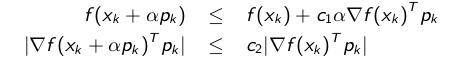

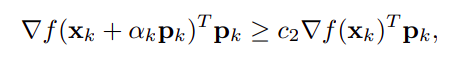

In [45]:
steepest_descent(x0,  kmax, tol, descent_method='fr', grad_method='f', grad_method_k=4)


1 0.1395
1 0.06277500000000001
2 0.028248750000000006
3 0.012711937500000003
1 0.005720371875000001


(array([[ 0.17534527, -0.19166225, -0.5401741 , ..., -0.68553066,
         -0.68553369, -0.68553667],
        [ 0.0189159 , -0.29784616, -0.59378956, ..., -0.6856539 ,
         -0.68565523, -0.68565655],
        [ 0.1043832 , -0.23925337, -0.56460091, ..., -0.68559136,
         -0.68559355, -0.68559572],
        ...,
        [ 0.22335622, -0.16036959, -0.52402947, ..., -0.68548627,
         -0.6854899 , -0.68549348],
        [ 0.25602203, -0.13962057, -0.51338695, ..., -0.68545512,
         -0.68545918, -0.68546318],
        [ 0.69188438,  0.06253865, -0.43841135, ..., -0.68521269,
         -0.68522007, -0.68522735]]),
 149,
 -3953.4178656904796,
 83.53538346290588)

In [39]:
n = 10**4
np.random.seed(288874)
x0 = np.random.random(n)
kmax = 150
tol = 10**(-5)

In [22]:
v = [2, 5, 10]

print(delta_f(v, method='f', k=10))
print(delta_f(v))

[  11.0000006   130.99997006 1010.99959279]
[  11  131 1011]


# 1. n = 10^4

## A) Exact gradient

### Steepest descent, Fletcher Reeves, Polak Ribier

In [50]:
n = 10**4
np.random.seed(288874)
x0 = np.random.random(n)

x_seq_4_e_st, k_4_e_st, fk_4_e_st, t_4_e_st = steepest_descent(x0,  kmax, tol, grad_method='e')
x_seq_4_e_fr, k_4_e_fr, fk_4_e_fr, t_4_e_fr = steepest_descent(x0,  kmax, tol, descent_method='fr', grad_method='e')
x_seq_4_e_pr, k_4_e_pr, fk_4_e_pr, t_4_e_pr = steepest_descent(x0,  kmax, tol, descent_method='pr', grad_method='e')

print(f"Steepest, exact for 10^4 --- Iteration: {k_4_e_st+1}, time:{t_4_e_st} s")
print(f"Fletcher Reeves, exact for 10^4 --- Iteration: {k_4_e_fr+1}, time:{t_4_e_fr} s")
print(f"Polak Ribier, exact for 10^4 --- Iteration: {k_4_e_pr+1}, time:{t_4_e_pr} s")


Steepest, exact for 10^4 --- Iteration: 15, time:2.076200485229492 s
Fletcher Reeves, exact for 10^4 --- Iteration: 14, time:2.104492425918579 s
Polak Ribier, exact for 10^4 --- Iteration: 17, time:2.437563419342041 s


## B) Forward differences gradient

### Steepest descent

In [51]:
n = 10**4
np.random.seed(288874)
x0 = np.random.random(n)


x_seq_k_4_f_st = [] 
k_k_4_f_st = []
fk_k_4_f_st = []
t_k_4_f_st = []

for i in range(4, 15, 2):
    print(f"k: {i}")
    x_seq_i, k_i, fk_i, t_i = steepest_descent(x0,  kmax, tol, grad_method='f', grad_method_k=i)
    
    print(f"Iteration: {k_i+1}, time:{t_i} s \n")
    
    x_seq_k_4_f_st.append(x_seq_i)
    k_k_4_f_st.append(k_i)
    fk_k_4_f_st.append(fk_i)
    t_k_4_f_st.append(t_i)

k: 4
Iteration: 150, time:89.12974143028259 s 

k: 6
Iteration: 150, time:86.10775184631348 s 

k: 8
Iteration: 150, time:84.33502650260925 s 

k: 10
Iteration: 15, time:7.610975980758667 s 

k: 12
Iteration: 19, time:10.025532007217407 s 

k: 14
Iteration: 18, time:10.97890591621399 s 



### Fletcher Reeves

In [55]:
n = 10**4
np.random.seed(288874)
x0 = np.random.random(n)


x_seq_k_4_f_fr = [] 
k_k_4_f_fr = []
fk_k_4_f_fr = []
t_k_4_f_fr = []

for i in range(4, 15, 2):
    print(f"k: {i}")
    x_seq_i, k_i, fk_i, t_i = steepest_descent(x0,  kmax, tol, descent_method='fr', grad_method='f', grad_method_k=i)
    
    print(f"Iteration: {k_i+1}, time:{t_i} s \n")
    
    x_seq_k_4_f_fr.append(x_seq_i)
    k_k_4_f_fr.append(k_i)
    fk_k_4_f_fr.append(fk_i)
    t_k_4_f_fr.append(t_i)

k: 4
Iteration: 150, time:89.98417973518372 s 

k: 6
Iteration: 14, time:8.55659794807434 s 

k: 8
Iteration: 14, time:9.829858779907227 s 

k: 10
Iteration: 14, time:8.01416277885437 s 

k: 12
Iteration: 23, time:12.368697166442871 s 

k: 14
Iteration: 34, time:17.991361379623413 s 



### Polak Ribier

In [56]:
n = 10**4
np.random.seed(288874)
x0 = np.random.random(n)


x_seq_k_4_f_pr = [] 
k_k_4_f_pr = []
fk_k_4_f_pr = []
t_k_4_f_pr = []

for i in range(4, 15, 2):
    print(f"k: {i}")
    x_seq_i, k_i, fk_i, t_i = steepest_descent(x0,  kmax, tol, descent_method='pr', grad_method='f', grad_method_k=i)
    
    print(f"Iteration: {k_i+1}, time:{t_i} s \n")
    
    x_seq_k_4_f_pr.append(x_seq_i)
    k_k_4_f_pr.append(k_i)
    fk_k_4_f_pr.append(fk_i)
    t_k_4_f_pr.append(t_i)

k: 4
Iteration: 150, time:90.68399333953857 s 

k: 6
Iteration: 17, time:9.736747741699219 s 

k: 8
Iteration: 17, time:9.156349182128906 s 

k: 10
Iteration: 17, time:9.6251802444458 s 

k: 12
Iteration: 46, time:26.102468490600586 s 

k: 14
Iteration: 51, time:29.105950593948364 s 



# 2. n = 10^5

## A) Exact gradient

### Steepest descent, Fletcher Reeves, Polak Ribier

In [57]:
n = 10**5
np.random.seed(288874)
x0 = np.random.random(n)

x_seq_5_e_st, k_5_e_st, fk_5_e_st, t_5_e_st = steepest_descent(x0,  kmax, tol, grad_method='e')
x_seq_5_e_fr, k_5_e_fr, fk_5_e_fr, t_5_e_fr = steepest_descent(x0,  kmax, tol, descent_method='fr', grad_method='e')
x_seq_5_e_pr, k_5_e_pr, fk_5_e_pr, t_5_e_pr = steepest_descent(x0,  kmax, tol, descent_method='pr', grad_method='e')

print(f"Steepest, exact for 10^4 --- Iteration: {k_5_e_st+1}, time:{t_5_e_st} s")
print(f"Fletcher Reeves, exact for 10^4 --- Iteration: {k_5_e_fr+1}, time:{t_5_e_fr} s")
print(f"Polak Ribier, exact for 10^4 --- Iteration: {k_5_e_pr+1}, time:{t_5_e_pr} s")


Steepest, exact for 10^4 --- Iteration: 16, time:23.64052963256836 s
Fletcher Reeves, exact for 10^4 --- Iteration: 15, time:21.63531994819641 s
Polak Ribier, exact for 10^4 --- Iteration: 18, time:27.07680058479309 s


## B) Forward difference gradient

### Steepest descent

In [58]:
n = 10**5
np.random.seed(288874)
x0 = np.random.random(n)


x_seq_k_5_f_st = [] 
k_k_5_f_st = []
fk_k_5_f_st = []
t_k_5_f_st = []

for i in range(4, 15, 2):
    print(f"k: {i}")
    x_seq_i, k_i, fk_i, t_i = steepest_descent(x0,  kmax, tol, grad_method='f', grad_method_k=i)
    
    print(f"Iteration: {k_i+1}, time:{t_i} s \n")
    
    x_seq_k_5_f_st.append(x_seq_i)
    k_k_5_f_st.append(k_i)
    fk_k_5_f_st.append(fk_i)
    t_k_5_f_st.append(t_i)

k: 4


KeyboardInterrupt: 

### Fletcher Reeves

In [ ]:
n = 10**5
np.random.seed(288874)
x0 = np.random.random(n)


x_seq_k_5_f_fr = [] 
k_k_5_f_fr = []
fk_k_5_f_fr = []
t_k_5_f_fr = []

for i in range(4, 15, 2):
    print(f"k: {i}")
    x_seq_i, k_i, fk_i, t_i = steepest_descent(x0,  kmax, tol, descent_method='fr', grad_method='f', grad_method_k=i)
    
    print(f"Iteration: {k_i+1}, time:{t_i} s\n")
    
    x_seq_k_5_f_fr.append(x_seq_i)
    k_k_5_f_fr.append(k_i)
    fk_k_5_f_fr.append(fk_i)
    t_k_5_f_fr.append(t_i)

### Polak Ribier

In [ ]:
n = 10**5
np.random.seed(288874)
x0 = np.random.random(n)


x_seq_k_5_f_pr = [] 
k_k_5_f_pr = []
fk_k_5_f_pr = []
t_k_5_f_pr = []

for i in range(4, 15, 2):
    print(f"k: {i}")
    x_seq_i, k_i, fk_i, t_i = steepest_descent(x0,  kmax, tol, descent_method='pr', grad_method='f', grad_method_k=i)
    
    print(f"Iteration: {k_i+1}, time:{t_i} s\n")
    
    x_seq_k_5_f_pr.append(x_seq_i)
    k_k_5_f_pr.append(k_i)
    fk_k_5_f_pr.append(fk_i)
    t_k_5_f_pr.append(t_i)

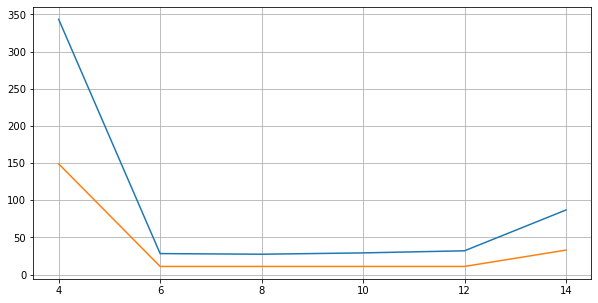

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
plt.grid()
ax = plt.plot(range(4, 15, 2), t_k_4_f_st)
ax = plt.plot(range(4, 15, 2), t_k_4_f_fr)
ax = plt.plot(range(4, 15, 2), t_k_4_f_pr)
ax.legend(['Steepest', 'FR', 'PR'], loc ="upper left", prop={'size': 20})



In [84]:
n = 10**3
np.random.seed(288874)
x0 = np.random.random(n)


for i in range(10,20):    
    x_seq_i, k_i, fk_i, t_i = steepest_descent(x0, i, tol, grad_method='f', grad_method_k=2)
    
    print(i, x_seq_i[:,k_i])

10 [-0.72472807 -0.73787053 -0.73097963 -0.69301367 -0.69375122 -0.6946685
 -0.70877179 -0.71911872 -0.70578684 -0.70554801 -0.69172507 -0.69376923
 -0.68582848 -0.6947902  -0.69244503 -0.71978692 -0.69455798 -0.71622325
 -0.68611017 -0.69811554 -0.68929053 -0.72893953 -0.6881763  -0.69145857
 -0.68999378 -0.724203   -0.70273998 -0.69505741 -0.68526993 -0.68607322
 -0.71090534 -0.68531153 -0.68904259 -0.72570949 -0.71878128 -0.70142101
 -0.69891288 -0.7283081  -0.73282547 -0.70201176 -0.69285435 -0.68930593
 -0.69609783 -0.69051231 -0.68717813 -0.68706623 -0.69556152 -0.72379053
 -0.69223589 -0.69445055 -0.70549508 -0.71645967 -0.68607926 -0.7073386
 -0.6852669  -0.68781209 -0.70656021 -0.68561764 -0.73103025 -0.68603021
 -0.71102934 -0.73804606 -0.71059048 -0.70808795 -0.68890508 -0.69133214
 -0.69405332 -0.69288587 -0.68718115 -0.70455559 -0.69114875 -0.69440062
 -0.73449892 -0.73607965 -0.68558285 -0.69264152 -0.70389604 -0.68560364
 -0.70839337 -0.68834403 -0.69454004 -0.68536213 -

KeyboardInterrupt: 

In [53]:
for i in range(len(k_k)):
    print(range(2, 15, 2)[i])    
    print(k_k[i], t_k[i])

2
998 119.52804613113403
4
998 116.28724718093872
6
998 112.26440358161926
8
12 1.3172345161437988
10
12 1.335909128189087
12
12 1.3207130432128906
14
14 1.6845183372497559


In [6]:
steepest_descent(x0,  kmax, tol, grad_method='f', grad_method_k=2)

KeyboardInterrupt: 

In [35]:
x_seq, k, fk, t = steepest_descent(x0,  kmax, tol)

In [27]:
x_seq_fr, k_fr, fk_fr, t_fr = steepest_descent(x0, kmax, tol,  descent_method='fr')

In [28]:
x_seq_pr, k_pr, fk_pr, t_pr = steepest_descent(x0, kmax, tol,  descent_method='pr')

In [36]:
#n2
print(k, k_fr, k_pr)
print(t, t_fr, t_pr)

12 12 15
0.23470473289489746 22.778156518936157 26.53243327140808


In [19]:
#n3
print(k, k_fr, k_pr)
print(t, t_fr, t_pr)

12 10 13
0.21367144584655762 0.17501425743103027 0.2216014862060547


In [24]:
#n4
print(k, k_fr, k_pr)
print(t, t_fr, t_pr)

12 11 14
2.11283278465271 2.082073211669922 2.6291205883026123


In [29]:
#n5
print(k, k_fr, k_pr)
print(t, t_fr, t_pr)

13 12 15
24.336535215377808 22.778156518936157 26.53243327140808


In [ ]:
v = [2, 4, 10]

In [ ]:
delta_f(v, method='forward')

In [ ]:
delta_f(v)

In [ ]:
for k in range(2,4,2):
    print(k, delta_f(v,method='centered', k=k))